# Vizualization on the regressions

Using data science principles, this notebook is used for a simple overview in the results obtained in the regressions in each model.

![arquitetura_experimento](./assets/arq.png)

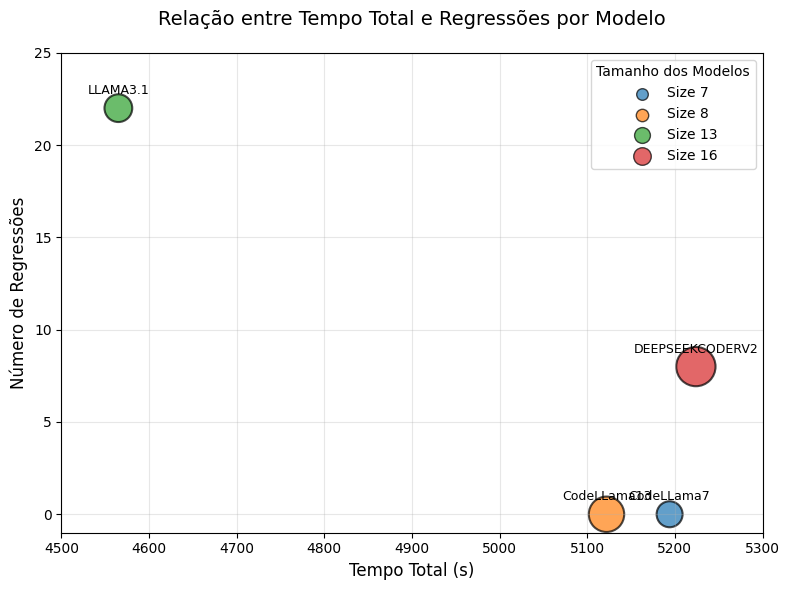

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../../data/TimeCodeExperiment/compiled_models.csv")

color =  ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'] 

plt.figure(figsize=(8, 6))
plt.scatter(
    x=df['total_time'],
    y=df['regression'],
    s=df['size']*50,
    c=color,
    alpha=0.7,
    edgecolors='k',
    linewidth=1.5
)

# Adicionando rótulos
for i, row in df.iterrows():
    plt.annotate(
        row['model'],
        (row['total_time'], row['regression']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )

# Customização do gráfico
plt.title('Relação entre Tempo Total e Regressões por Modelo', fontsize=14, pad=20)
plt.xlabel('Tempo Total (s)', fontsize=12)
plt.ylabel('Número de Regressões', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(4500, 5300)
plt.ylim(-1, 25)

# Legenda de tamanho
sizes = df['size'].unique()
for size in sorted(sizes):
    plt.scatter([], [], s=size*10, label=f'Size {size}', edgecolors='k', alpha=0.7)
plt.legend(title='Tamanho dos Modelos', frameon=True, loc='upper right')

plt.tight_layout()
plt.show()

(0.0, 1.5)

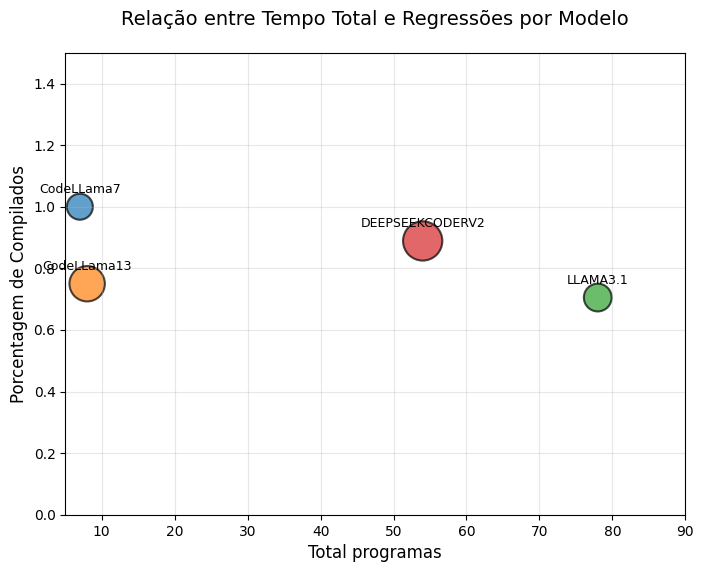

In [19]:


plt.figure(figsize=(8, 6))
plt.scatter(
    x=df['total'],
    y=df['proportion_compiled'],
    s=df['size']*50,
    c=color,
    alpha=0.7,
    edgecolors='k',
    linewidth=1.5
)

# Adicionando rótulos
for i, row in df.iterrows():
    plt.annotate(
        row['model'],
        (row['total'], row['proportion_compiled']),
        textcoords="offset points",
        xytext=(0,10),
        ha='center',
        fontsize=9
    )

# Customização do gráfico
plt.title('Relação entre Tempo Total e Regressões por Modelo', fontsize=14, pad=20)
plt.xlabel('Total programas', fontsize=12)
plt.ylabel('Porcentagem de Compilados', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(5, 90)
plt.ylim(0, 1.5)


In [26]:
deep_sec = pd.read_csv("../../data/TimeCodeExperiment/deepseekv2instructed/model_chain_programs.csv")
llama_sec = pd.read_csv("../../data/TimeCodeExperiment/llama3.1_data/model_chain_programs.csv")
codel7_sec = pd.read_csv("../../data/TimeCodeExperiment/codellama7/model_chain_programs.csv")
codel13_sec = pd.read_csv("../../data/TimeCodeExperiment/codellama13/model_chain_programs.csv")
models = [deep_sec,llama_sec,codel7_sec,codel13_sec]

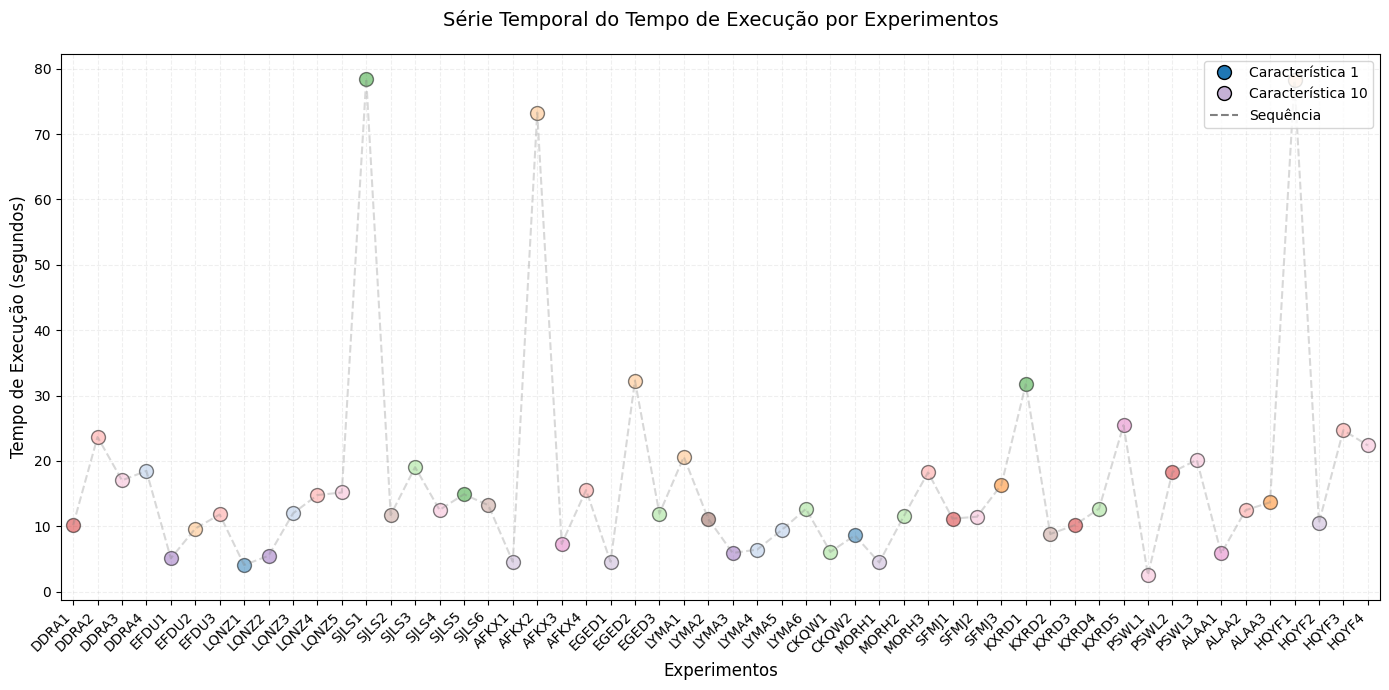

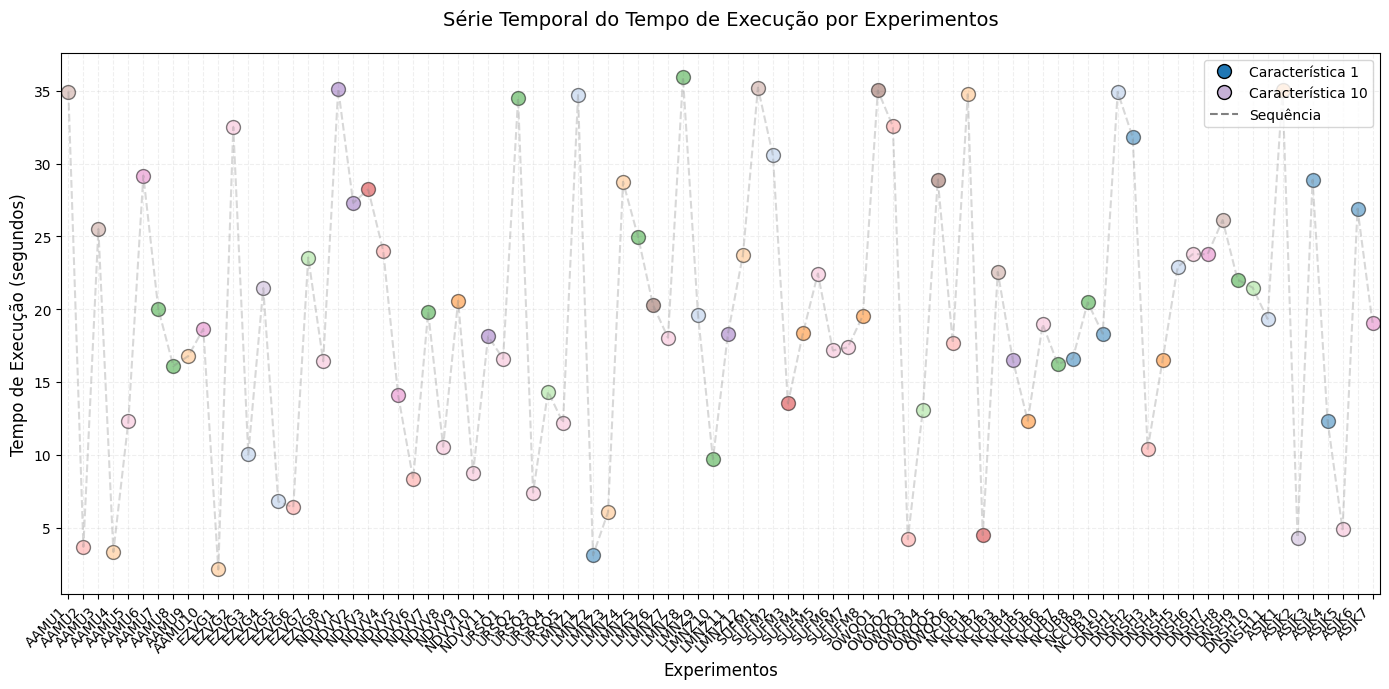

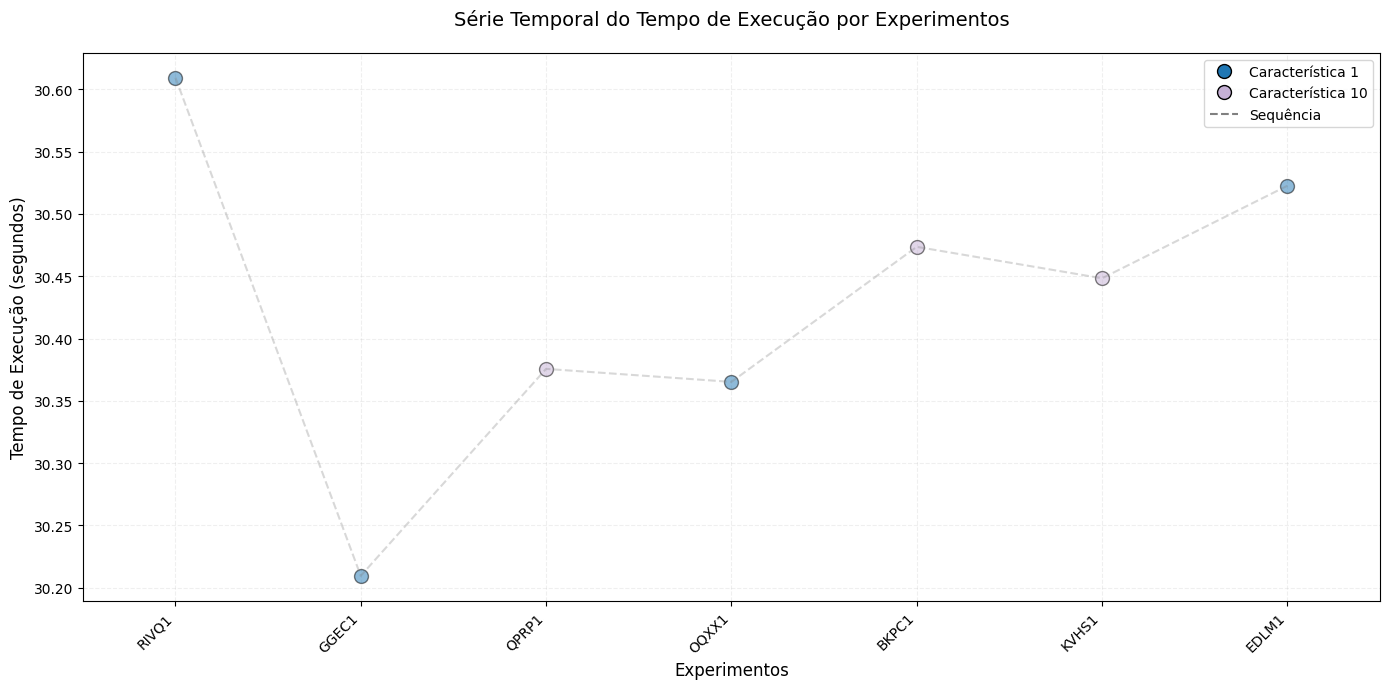

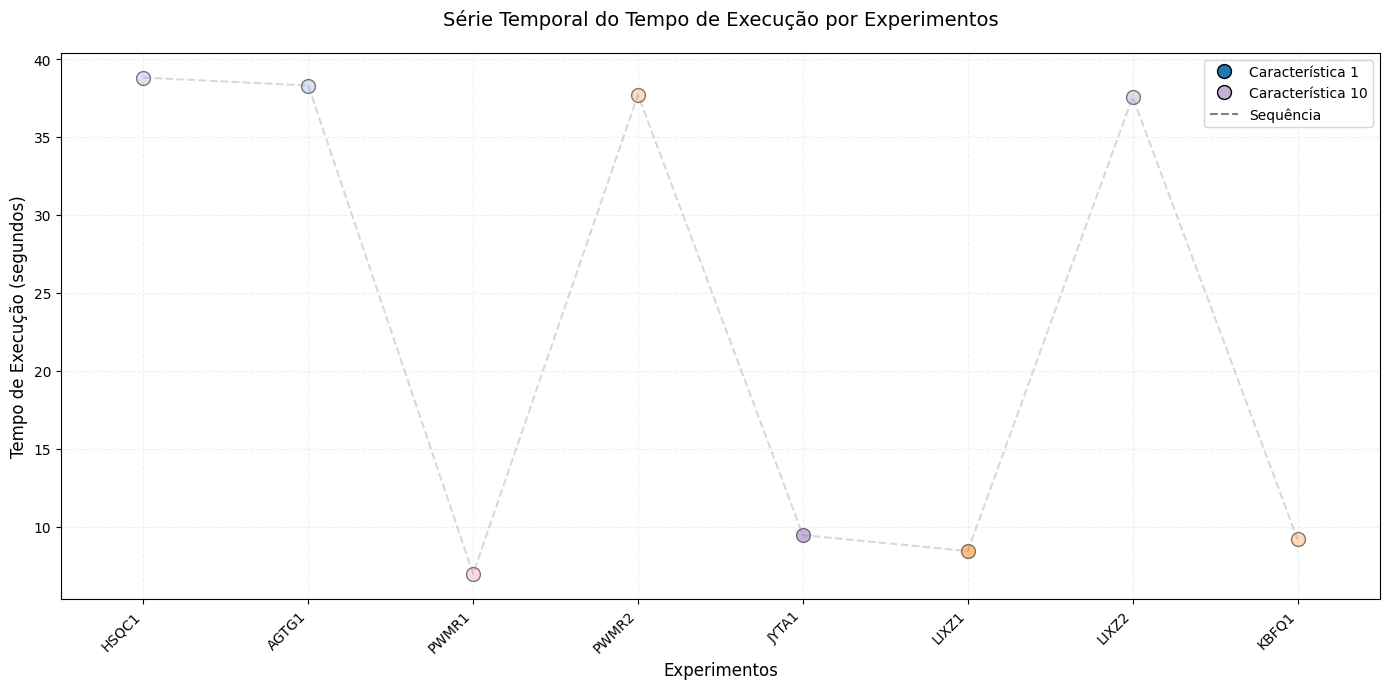

In [28]:

for df in models:
    
    color_map = {
    1:  '#1f77b4',  2:  '#aec7e8',
    3:  '#ff7f0e',  4:  '#ffbb78',
    5:  '#2ca02c',  6:  '#98df8a',
    7:  '#d62728',  8:  '#ff9896',
    9:  '#9467bd', 10:  '#c5b0d5',
    11: '#8c564b', 12: '#c49c94',
    13: '#e377c2', 14: '#f7b6d2',
    15: '#7f7f7f', 16: '#c7c7c7',
    17: '#bcbd22', 18: '#dbdb8d',
    19: '#17becf', 20: '#9edae5'
    }

    
    plt.figure(figsize=(14, 7))
    ax = plt.gca()
    
    for idx, row in df.iterrows():
        ax.plot(idx, row['seconds'], 
                marker='o',
                markersize=10,
                markerfacecolor=color_map[row['caracteristcs']],
                markeredgecolor='black',
                linestyle='-',
                color='gray',
                alpha=0.5)
    
    ax.plot(df.index, df['seconds'], 
            linestyle='--', 
            color='gray', 
            alpha=0.3,
            label='Sequência temporal')
    
    
    ax.set_xticks(df.index)
    ax.set_xticklabels(df['code_name'], rotation=45, ha='right')
    ax.set_xlim(-0.5, len(df)-0.5)
    
    
    plt.xlabel('Experimentos', fontsize=12)
    plt.ylabel('Tempo de Execução (segundos)', fontsize=12)
    plt.title('Série Temporal do Tempo de Execução por Experimentos', fontsize=14, pad=20)
    
    plt.grid(True, alpha=0.2, linestyle='--')
    
    
    legend_elements = [
        plt.Line2D([0], [0], marker='o', color='w', label='Característica 1',
                   markerfacecolor=color_map[1], markersize=10, markeredgecolor='black'),
        plt.Line2D([0], [0], marker='o', color='w', label='Característica 10',
                   markerfacecolor=color_map[10], markersize=10, markeredgecolor='black'),
        plt.Line2D([0], [0], color='gray', linestyle='--', label='Sequência')
    ]
    
    ax.legend(handles=legend_elements, loc='upper right', frameon=True)
    
    
    plt.tight_layout()
    plt.show()